In [2]:
import os
import cv2
import numpy as np

# Function to update the edge detection based on trackbar values
def update_edge_detection(_):
    image_copy = image.copy()
    # Get current trackbar values
    blur_kernel_size = cv2.getTrackbarPos('Blur', 'Edge Detection')
    canny_low_threshold = cv2.getTrackbarPos('Canny Low', 'Edge Detection')
    canny_high_threshold = cv2.getTrackbarPos('Canny High', 'Edge Detection')
    contour_area_threshold = cv2.getTrackbarPos('Contour Area', 'Edge Detection')

    grey_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Ensure the blur kernel size is a valid odd number
    blur_kernel_size = max(1, blur_kernel_size)
    if blur_kernel_size % 2 == 0:
        blur_kernel_size += 1

    # Apply Gaussian blur to the image
    blurred_image = cv2.GaussianBlur(grey_image, (blur_kernel_size, blur_kernel_size), 0)

    # Perform Canny edge detection
    edges = cv2.Canny(blurred_image, canny_low_threshold, canny_high_threshold)

    # # Contour detection
    # contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # sorted_ctrs = sorted(contours, key=lambda ctr: cv.boundingRect(ctr)[0])

    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    sorted_contours = sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

    # Filtering and drawing circles around coins
    for contour in sorted_contours:
        # Filter contours based on criteria (e.g., area, circularity, etc.)
        # Adjust the filtering criteria as per your specific needs
        area = cv2.contourArea(contour)
        if area < contour_area_threshold:
            continue

        # Compute minimum enclosing circle
        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)

        # Draw the circle on the original image
        cv2.circle(image_copy, center, radius, (0, 255, 0), 2)


    # # Detect circles in the image
    # crc = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 10, param1=50, param2=25, minRadius=0, maxRadius=0)

    # # # Ensure circles were found
    # # if crc is not None:

    # #     # Convert the coordinates and radius of the circles to integers
    # #     crc = np.round(crc[0, :]).astype("int")

    # #     # For each (x, y) coordinates and radius of the circles
    # #     for (x, y, r) in crc:

    # #         # Draw the circle
    # #         cv2.circle(image_copy, (x, y), r, (0, 255, 255), 4)

    # #         # Print coordinates
    # #         # print("x:{}, y:{}".format(x, y))

    # # Draw circles that are detected.
    # if crc is not None:
    
    #     # Convert the circle parameters a, b and r to integers.
    #     circles = np.uint16(np.around(crc))
    
    #     for pt in circles[0, :]:
    #         a, b, r = pt[0], pt[1], pt[2]
    
    #         # Draw the circumference of the circle.
    #         cv2.circle(image_copy, (a, b), r, (0, 255, 0), 2)
    
    #         # Draw a small circle (of radius 1) to show the center.
    #         cv2.circle(image_copy, (a, b), 1, (0, 0, 255), 3)
    #         # cv2.imshow("Detected Circle", image_copy)
    #         # cv2.waitKey(0)

    # Display the edges
    cv2.imshow('Edge Detection', edges)
    cv2.imshow('image', image_copy)


def main(path):
    global image
    # Load the image
    image = cv2.imread(path)

    # Create a window for displaying the edge detection result
    cv2.namedWindow('Edge Detection')

    # Create trackbars for adjusting parameters
    cv2.createTrackbar('Blur', 'Edge Detection', 1, 20, update_edge_detection)
    cv2.createTrackbar('Canny Low', 'Edge Detection', 0, 255, update_edge_detection)
    cv2.createTrackbar('Canny High', 'Edge Detection', 0, 255, update_edge_detection)
    cv2.createTrackbar('Contour Area', 'Edge Detection', 500, 2000, update_edge_detection)

    cv2.setTrackbarPos('Blur', 'Edge Detection', 20)
    cv2.setTrackbarPos('Canny Low', 'Edge Detection', 50)
    cv2.setTrackbarPos('Canny High', 'Edge Detection', 150)
    cv2.setTrackbarPos('Contour Area', 'Edge Detection', 0)

    # Initialize the edge detection with default parameter values
    update_edge_detection(None)

# Resize the display window
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
# cv2.resizeWindow('image', 800, 600)

image_folder = "E:/Monis/coin_calculator/data/ob/"

image_files = []

for root, dirs, files in os.walk(image_folder):
    for file in files:
        if file.endswith(".jpg"):
            image_files.append(os.path.join(root, file))

break_flag = False            

for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    main(image_path)
    while True:
        key = cv2.waitKey(1) & 0xFF
        if key == 27:  # 'Esc' key
            break_flag = True
            break
        elif key == ord('q'):
            break
    if break_flag:
        break

# Clean up
cv2.destroyAllWindows()


In [1]:
import os
import cv2
import numpy as np

# Function to update the edge detection based on trackbar values
def update_edge_detection(_):
    image_copy = image.copy()
    # Get current trackbar values
    blur_kernel_size = cv2.getTrackbarPos('Blur', 'Edge Detection')
    canny_low_threshold = cv2.getTrackbarPos('Canny Low', 'Edge Detection')
    canny_high_threshold = cv2.getTrackbarPos('Canny High', 'Edge Detection')
    hough_dp = cv2.getTrackbarPos('Hough dp', 'Edge Detection')
    hough_min_dist = cv2.getTrackbarPos('Hough minDist', 'Edge Detection')
    hough_param1 = cv2.getTrackbarPos('Hough param1', 'Edge Detection')
    hough_param2 = cv2.getTrackbarPos('Hough param2', 'Edge Detection')
    hough_min_radius = cv2.getTrackbarPos('Hough minRadius', 'Edge Detection')
    hough_max_radius = cv2.getTrackbarPos('Hough maxRadius', 'Edge Detection')

    # Convert the image to grayscale
    grey_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # Ensure the blur kernel size is a valid odd number
    blur_kernel_size = max(1, blur_kernel_size)
    if blur_kernel_size % 2 == 0:
        blur_kernel_size += 1

    # Apply Gaussian blur to the grayscale image
    blurred_image = cv2.GaussianBlur(grey_image, (blur_kernel_size, blur_kernel_size), 0)

    # Perform Canny edge detection
    edges = cv2.Canny(blurred_image, canny_low_threshold, canny_high_threshold)

    # Close small gaps in the edges using morphological closing
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    edges_closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Circle detection
    circles = cv2.HoughCircles(edges_closed, cv2.HOUGH_GRADIENT, dp=hough_dp, minDist=hough_min_dist,
                               param1=hough_param1, param2=hough_param2,
                               minRadius=hough_min_radius, maxRadius=hough_max_radius)

    if circles is not None:
        # Convert the circle parameters to integers
        circles = np.round(circles[0, :]).astype(int)

        # Draw the detected circles on the original image
        for (x, y, r) in circles:
            cv2.circle(image_copy, (x, y), r, (0, 255, 0), 2)

    # Display the edges
    cv2.imshow('Edge Detection', edges)
    cv2.imshow('image', image_copy)


def main(path):
    global image
    # Load the image
    image = cv2.imread(path)

    # Create a window for displaying the edge detection result
    cv2.namedWindow('Edge Detection')
    cv2.namedWindow('image', cv2.WINDOW_NORMAL)

    # Create trackbars for adjusting parameters
    cv2.createTrackbar('Blur', 'Edge Detection', 1, 20, update_edge_detection)
    cv2.createTrackbar('Canny Low', 'Edge Detection', 0, 255, update_edge_detection)
    cv2.createTrackbar('Canny High', 'Edge Detection', 0, 255, update_edge_detection)
    cv2.createTrackbar('Hough dp', 'Edge Detection', 1, 10, update_edge_detection)
    cv2.createTrackbar('Hough minDist', 'Edge Detection', 10, 500, update_edge_detection)
    cv2.createTrackbar('Hough param1', 'Edge Detection', 50, 200, update_edge_detection)
    cv2.createTrackbar('Hough param2', 'Edge Detection', 10, 100, update_edge_detection)
    cv2.createTrackbar('Hough minRadius', 'Edge Detection', 0, 100, update_edge_detection)
    cv2.createTrackbar('Hough maxRadius', 'Edge Detection', 100, 500, update_edge_detection)

    cv2.setTrackbarPos('Blur', 'Edge Detection', 15)
    cv2.setTrackbarPos('Canny Low', 'Edge Detection', 0)
    cv2.setTrackbarPos('Canny High', 'Edge Detection', 90)
    cv2.setTrackbarPos('Hough dp', 'Edge Detection', 1)
    cv2.setTrackbarPos('Hough minDist', 'Edge Detection', 200)
    cv2.setTrackbarPos('Hough param1', 'Edge Detection', 100)
    cv2.setTrackbarPos('Hough param2', 'Edge Detection', 30)
    cv2.setTrackbarPos('Hough minRadius', 'Edge Detection', 7)
    cv2.setTrackbarPos('Hough maxRadius', 'Edge Detection', 250)

    # Initialize the edge detection with default parameter values
    update_edge_detection(None)

image_folder = "E:/Monis/coin_calculator/data/ob/"

image_files = []

for root, dirs, files in os.walk(image_folder):
    for file in files:
        if file.endswith(".jpg"):
            image_files.append(os.path.join(root, file))

break_flag = False            

for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    main(image_path)
    while True:
        key = cv2.waitKey(1) & 0xFF
        if key == 27:  # 'Esc' key
            break_flag = True
            break
        elif key == ord('q'):
            break
    if break_flag:
        break

# Clean up
cv2.destroyAllWindows()

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import cv2 as cv
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from pprint import pprint

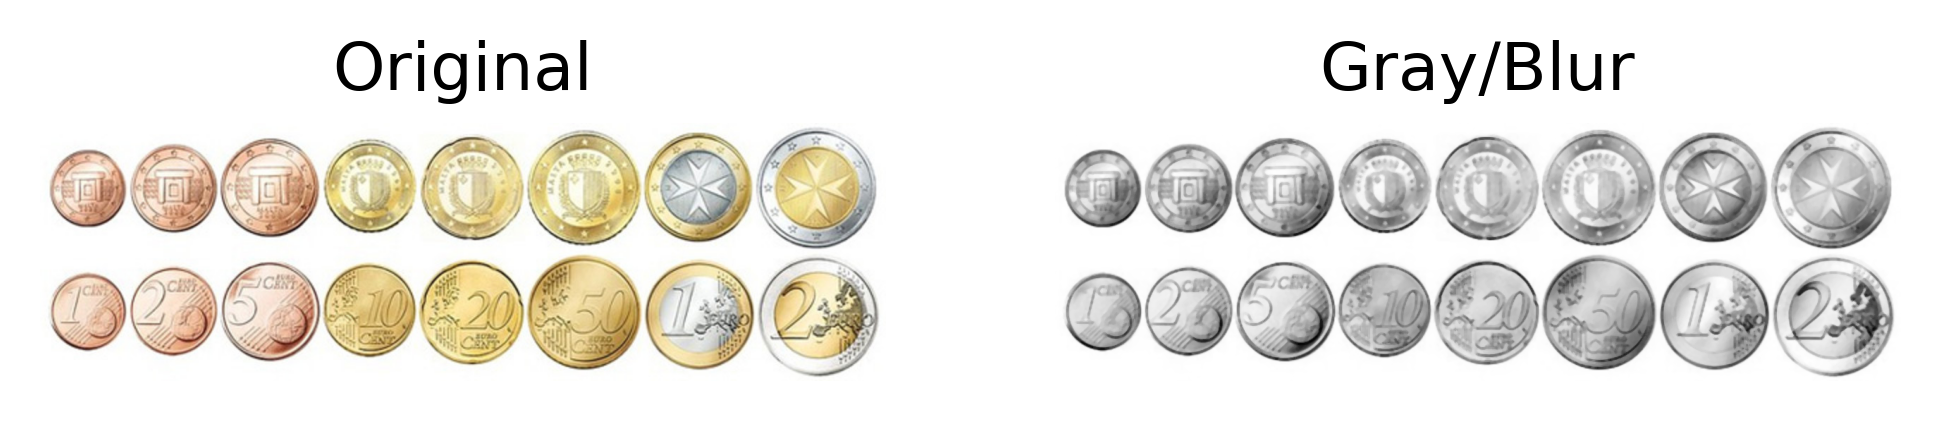

Treshold value: 200.0


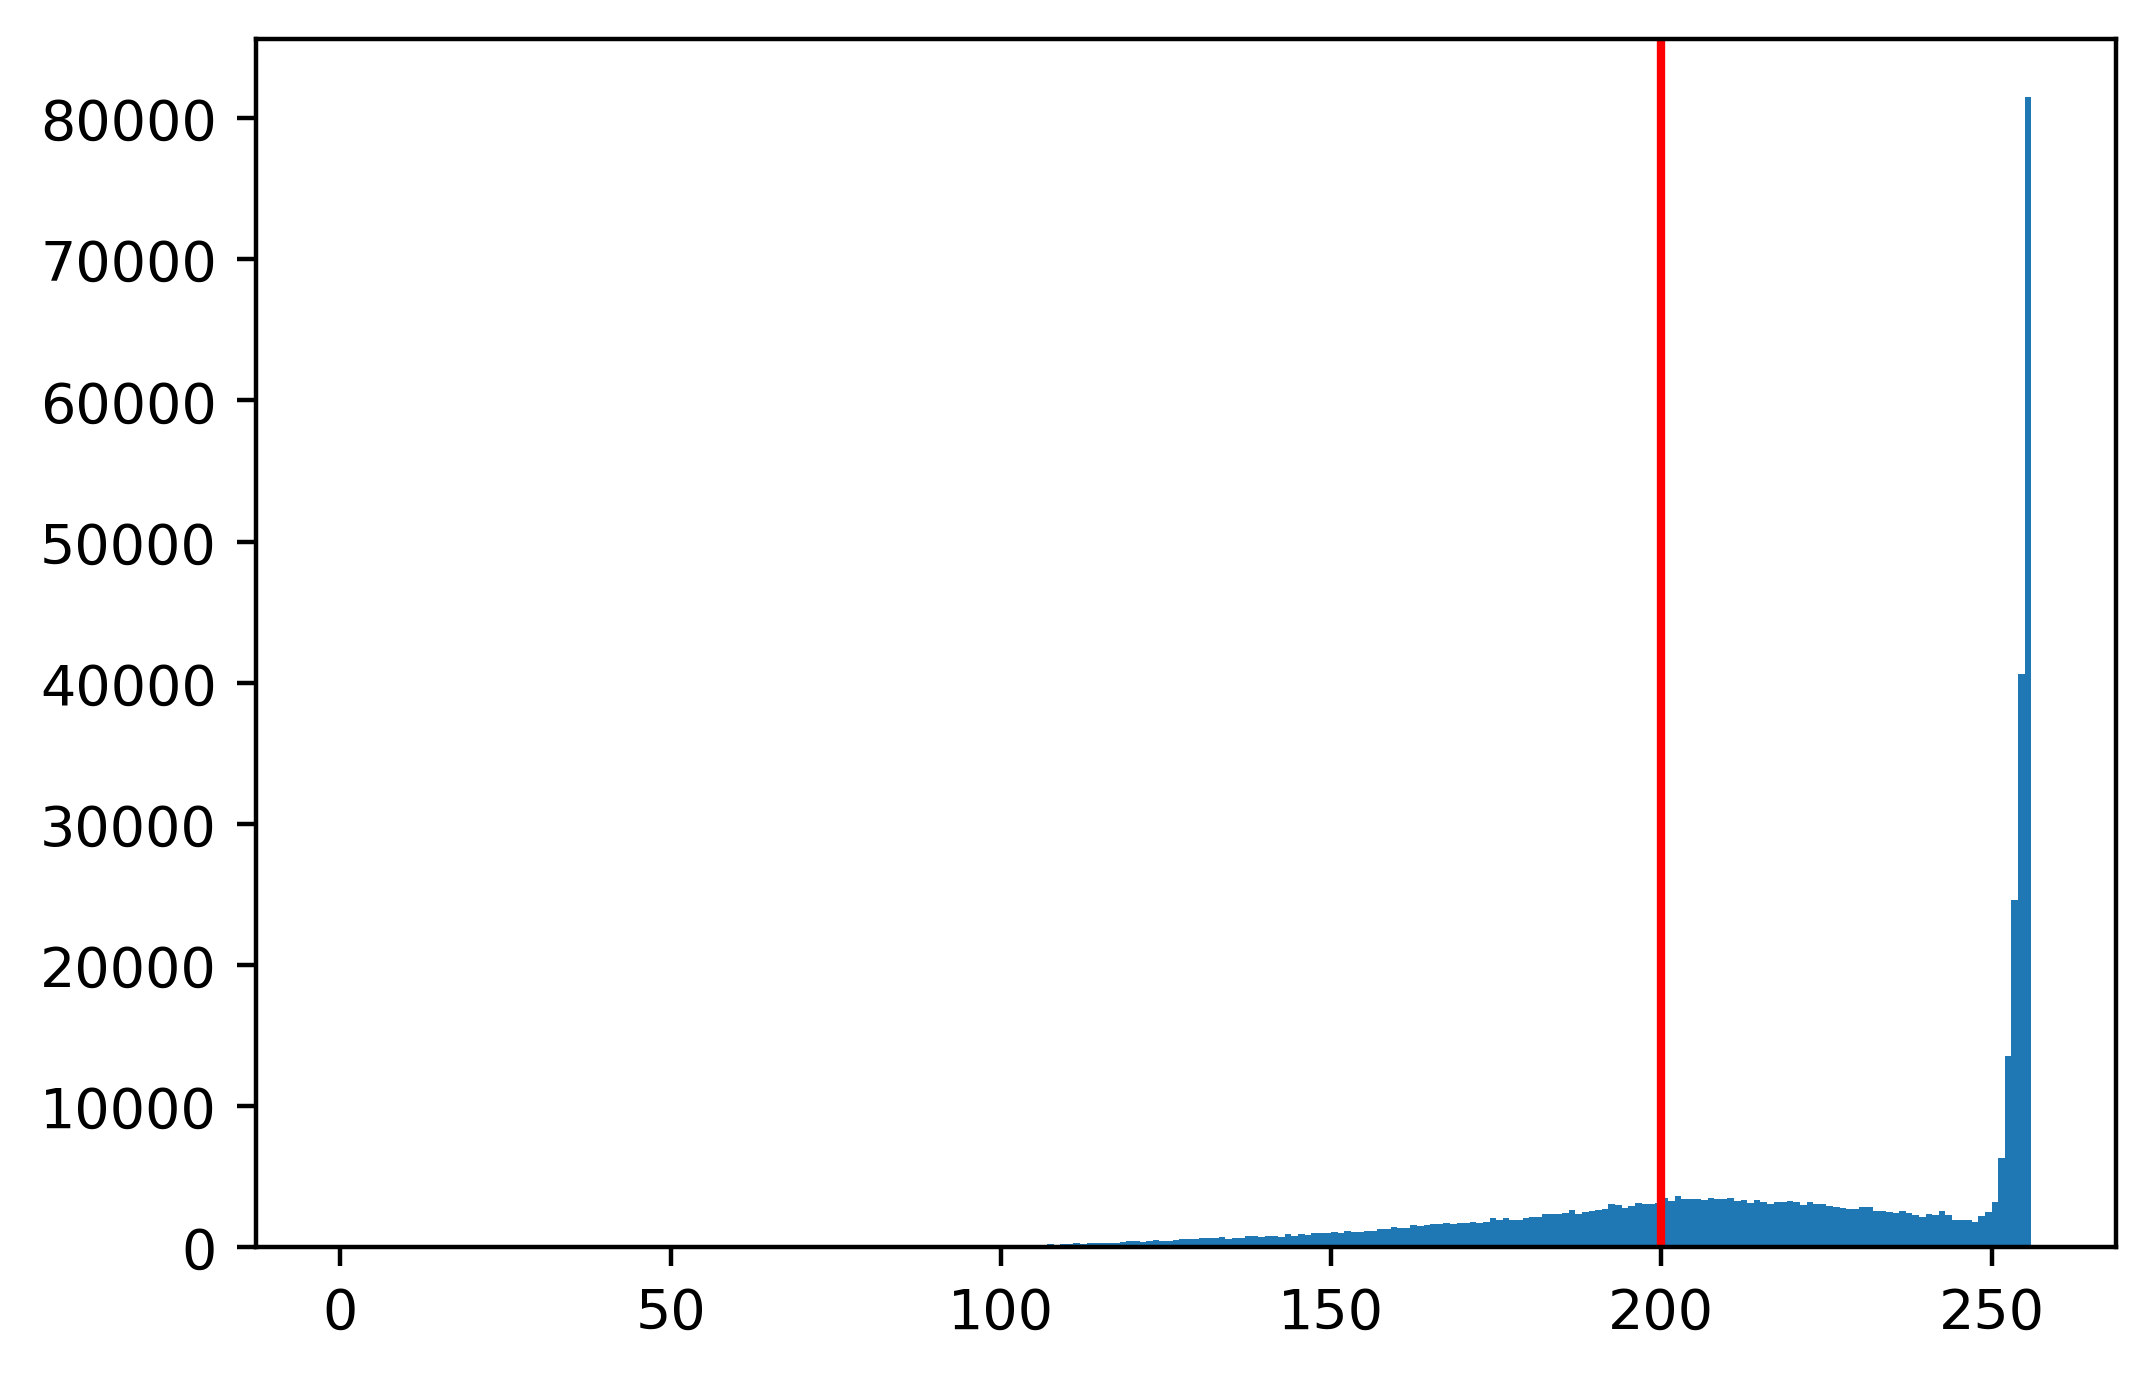

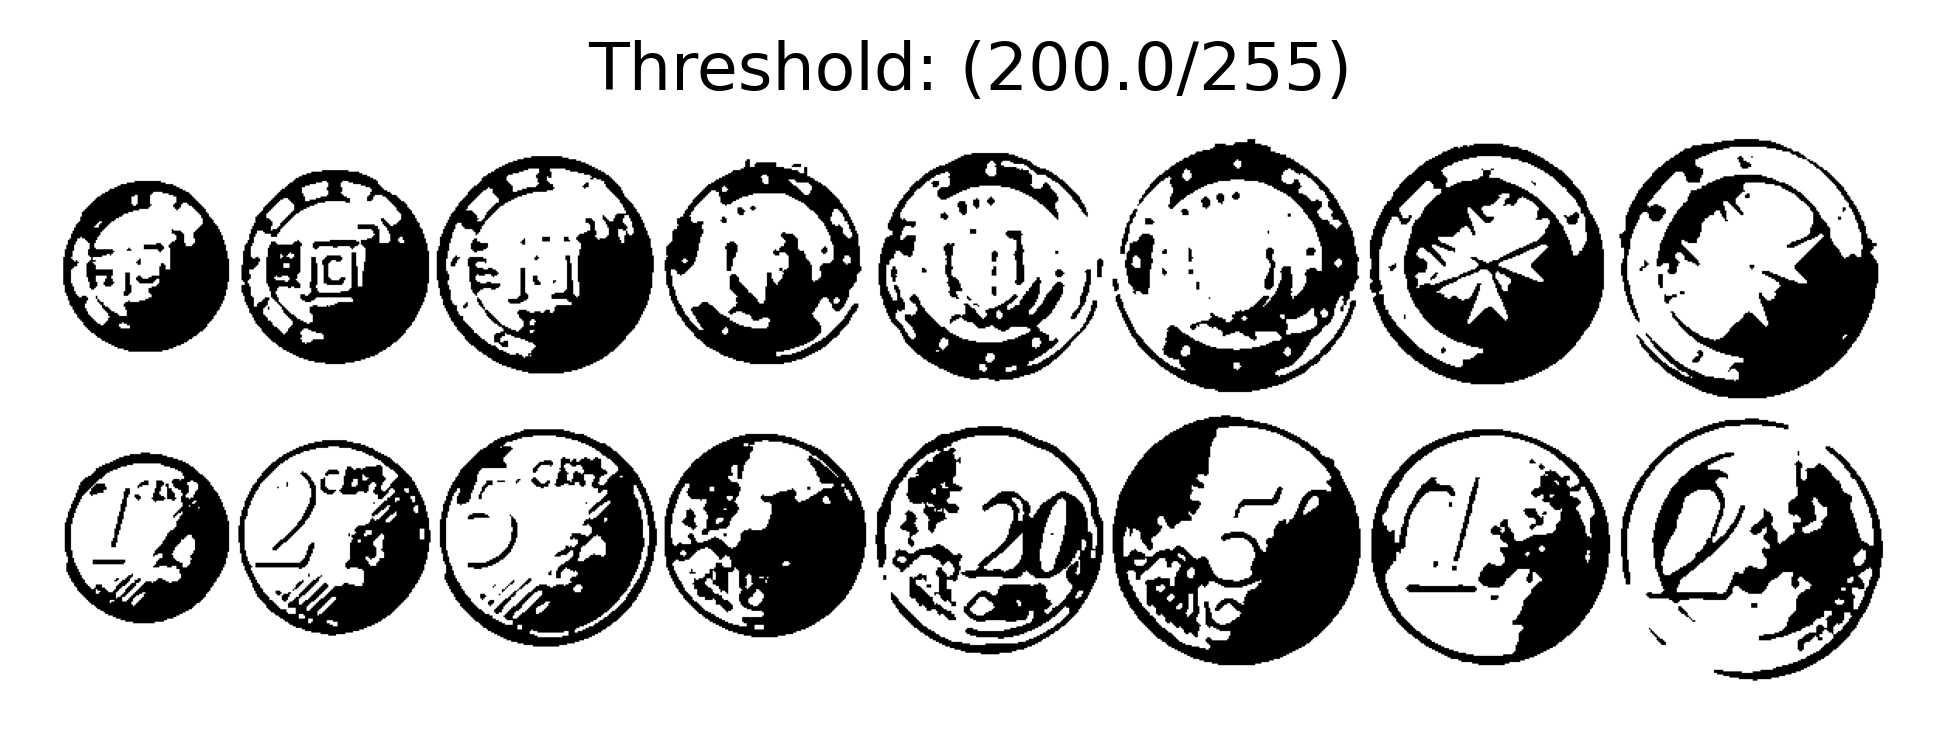

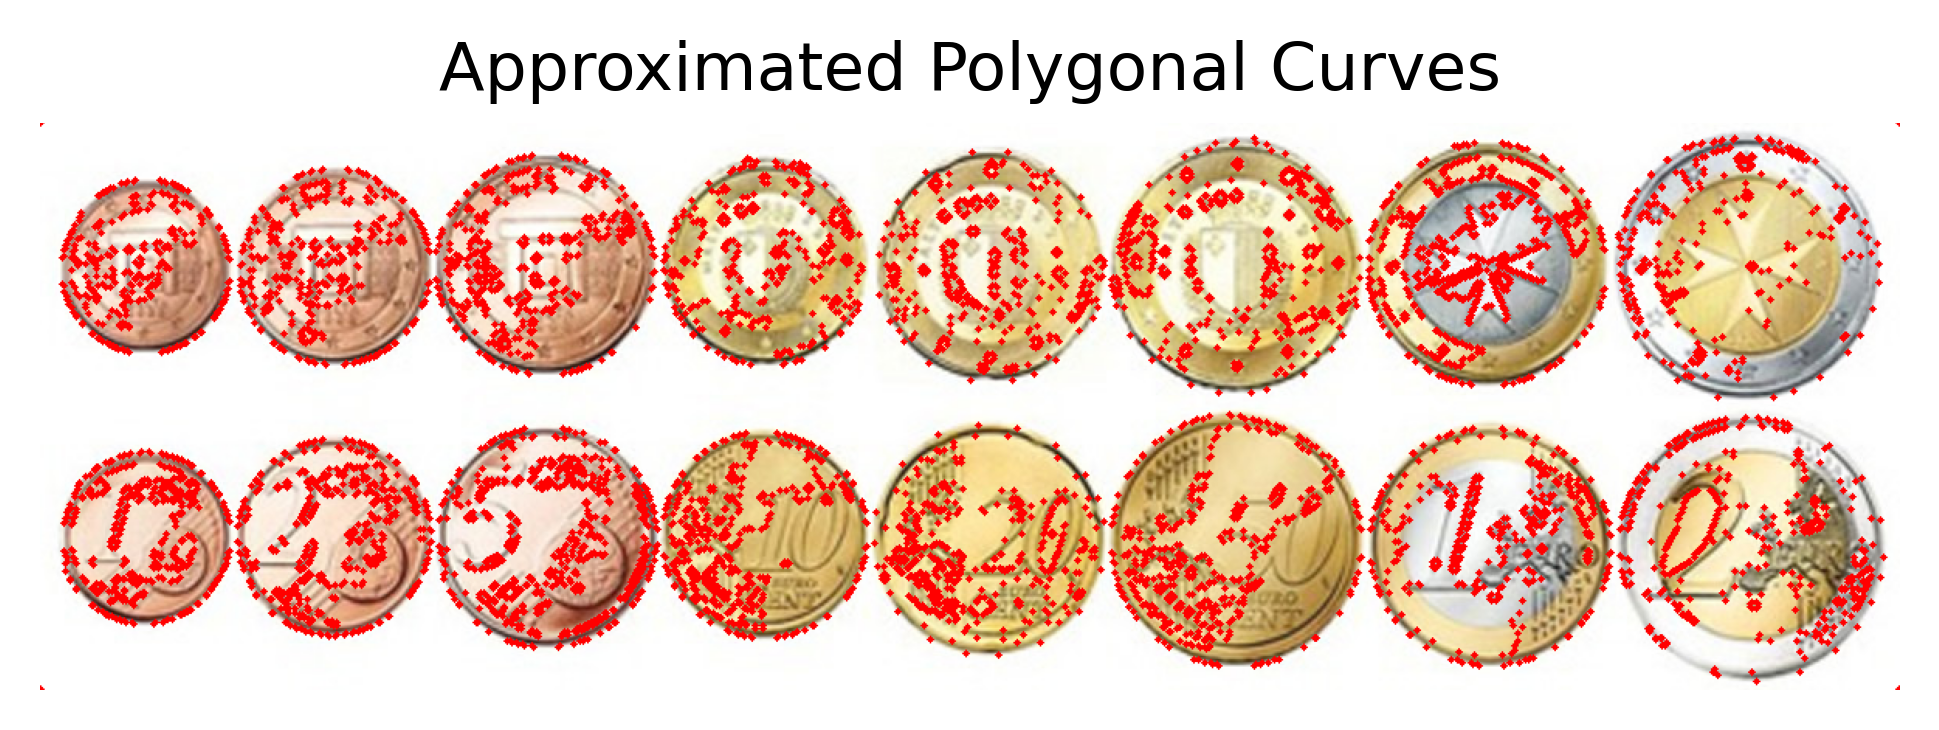

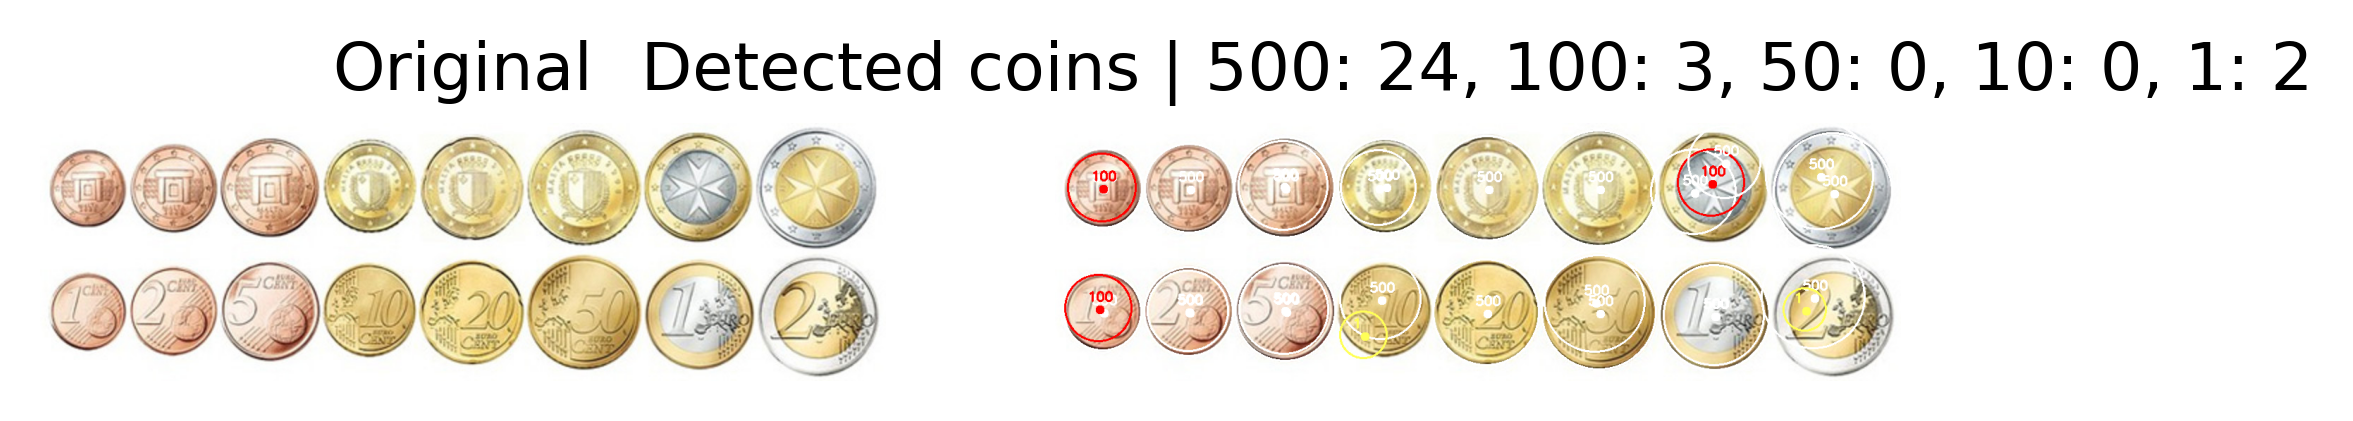

In [7]:
mpl.rcParams['figure.dpi'] = 200
original = cv.imread("E:/Monis/coin_calculator/data/cv/img2.jpg")
detected = original.copy()
img = original.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img = cv.medianBlur(img, 5)
fig = plt.figure()

fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.title("Original")
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.title("Gray/Blur")
plt.imshow(img, cmap='gray')

plt.show()

# ret0 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 13, 7)
# ret1 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 13, 7)
# _, thresh = cv.threshold(img, 50, 255, cv.THRESH_BINARY)

ret, thresh = cv.threshold(img, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
ret, thresh = cv.threshold(img, ret-10, 255, cv.THRESH_BINARY)
plt.axvline(x=ret, color="r")
print("Treshold value: {}".format(ret))
plt.hist(img.ravel(),256,[0,256]); plt.show()

fig = plt.figure()

# fig.add_subplot(2, 2, 1)
# plt.title("Mean")
# plt.imshow(ret0, cmap='gray')

# fig.add_subplot(2, 2, 2)
# plt.title("Gaussian")
# plt.imshow(ret1, cmap='gray')

fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.title("Threshold: ({}/255)".format(ret))
plt.imshow(thresh, cmap='gray')

plt.show()

contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
sorted_ctrs = sorted(contours, key=lambda ctr: cv.boundingRect(ctr)[0])
approxPolyCurves = original.copy()

for i, ctr in enumerate(sorted_ctrs):
    epsilon = 0.001*cv.arcLength(ctr,True)
    approx = cv.approxPolyDP(ctr,epsilon,True)    
    cv.drawContours(approxPolyCurves, approx, -1, (0, 0, 255), 3)

plt.title("Approximated Polygonal Curves")
plt.axis('off')
plt.imshow(cv.cvtColor(approxPolyCurves, cv.COLOR_BGR2RGB))
plt.show()

circleAreas = []
circleCenters = []
circles = {}
coins = {"500": 0, "100": 0, "50": 0, "10": 0, "5": 0, "1": 0}

for i, ctr in enumerate(sorted_ctrs):
    epsilon = 0.001*cv.arcLength(ctr,True)
    approx = cv.approxPolyDP(ctr,epsilon,True)
    if (len(approx) > 80):
        (x, y), radius = cv.minEnclosingCircle(ctr)
        if (thresh[int(y)][int(x)] != 0):
            area = int(math.pi * (radius ** 2))
            circles[radius] = (int(x), int(y))
            fontColor = (0,0,0)
            imgcenter = (int(x-15),int(y-10))
            font = cv.FONT_HERSHEY_SIMPLEX

            if (area > 7500):
                coins["500"] += 1
                text = "500"
                fontColor = (255,255,255)
            elif (7500 > area >= 6300):
                coins["100"] += 1
                text = "100"
                fontColor = (0,0,255)
            elif (6300 > area >= 5500):
                coins["10"] += 1
                text = "10"
                fontColor = (255,255,88)
            elif (5500 > area >= 5000):
                coins["50"] += 1
                text = "50"
                fontColor = (255,0,120)
            elif (5000 > area >= 3800):
                coins["5"] += 1
                text = "5"
                fontColor = (0,255,0)
            elif (area < 3800):
                coins["1"] += 1
                text = "1"
                fontColor = (88,255,255)
            cv.putText(detected, str(text), imgcenter, font, 0.6, fontColor, 2)
#                 cv.putText(original, str("{}: {}".format(text, int(radius))), imgcenter, font, 0.6, fontColor, 2)
            cv.circle(detected, (int(x), int(y)), int(radius), fontColor, 2)
            cv.rectangle(detected, (int(x), int(y)), (int(x)+5,int(y)+5), fontColor, 5)
cv.imwrite("images/detected.jpg", detected)

fig = plt.figure()

fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.title("Original")
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))

fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.title("Detected coins | 500: {0}, 100: {1}, 50: {2}, 10: {3}, 1: {4}".format(coins["500"], coins["100"], coins["50"], coins["10"], coins["1"]))
plt.imshow(cv.cvtColor(detected, cv.COLOR_BGR2RGB))

plt.show()


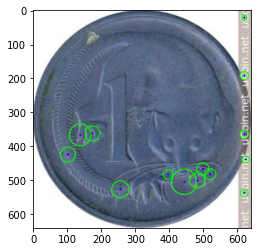

In [1]:

import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
  
# Read image.
img = cv2.imread('E:/Monis/coin_calculator/data/selected/test/1/021__1-Cent_australia.jpg', cv2.IMREAD_COLOR)
  
# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
               param2 = 30, minRadius = 1, maxRadius = 40)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)
  
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
        plt.imshow(img)

In [4]:
import cv2
import numpy as np
import random
import math


def verify_circle(dt, center, radius, inlierSet):
    counter = 0
    inlier = 0
    minInlierDist = 2.0
    maxInlierDistMax = 100.0
    maxInlierDist = radius / 25.0
    if maxInlierDist < minInlierDist:
        maxInlierDist = minInlierDist
    if maxInlierDist > maxInlierDistMax:
        maxInlierDist = maxInlierDistMax

    for t in np.arange(0, 2 * math.pi, 0.05):
        counter += 1
        cX = radius * math.cos(t) + center[0]
        cY = radius * math.sin(t) + center[1]

        if 0 <= cX < dt.shape[1] and 0 <= cY < dt.shape[0] and dt[int(cY), int(cX)] < maxInlierDist:
            inlier += 1
            inlierSet.append((cX, cY))

    return inlier / counter


def get_circle(p1, p2, p3):
    x1, x2, x3 = p1[0], p2[0], p3[0]
    y1, y2, y3 = p1[1], p2[1], p3[1]

    center_x = (x1 * x1 + y1 * y1) * (y2 - y3) + (x2 * x2 + y2 * y2) * (y3 - y1) + (x3 * x3 + y3 * y3) * (y1 - y2)
    center_x /= (2 * (x1 * (y2 - y3) - y1 * (x2 - x3) + x2 * y3 - x3 * y2))

    center_y = (x1 * x1 + y1 * y1) * (x3 - x2) + (x2 * x2 + y2 * y2) * (x1 - x3) + (x3 * x3 + y3 * y3) * (x2 - x1)
    center_y /= (2 * (x1 * (y2 - y3) - y1 * (x2 - x3) + x2 * y3 - x3 * y2))

    radius = math.sqrt((center_x - x1) * (center_x - x1) + (center_y - y1) * (center_y - y1))

    return (center_x, center_y), radius


def get_point_positions(binary_image):
    point_positions = []
    for y in range(binary_image.shape[0]):
        for x in range(binary_image.shape[1]):
            if binary_image[y, x] > 0:
                point_positions.append((x, y))
    return point_positions


def main():
    color = cv2.imread("E:/Monis/coin_calculator/data/selected/test/1/021__1-Cent_australia.jpg")
    gray = cv2.cvtColor(color, cv2.COLOR_BGR2GRAY)

    min_val, max_val, _, _ = cv2.minMaxLoc(gray)
    sub = min_val
    mult = 255.0 / (max_val - sub)
    normalized = mult * (gray - sub)

    _, mask = cv2.threshold(normalized, 100, 255, cv2.THRESH_BINARY)

    edge_positions = get_point_positions(mask)

    dt = cv2.distanceTransform((255 - mask).astype(np.uint8), cv2.DIST_L1, 3)

    n_iterations = 0
    best_circle_center = None
    best_circle_radius = 0
    best_circle_percentage = 0
    min_radius = 50
    min_circle_percentage = 0.05
    max_nr_of_iterations = len(edge_positions)

    for its in range(max_nr_of_iterations):
        idx1 = random.randint(0, len(edge_positions) - 1)
        idx2 = random.randint(0, len(edge_positions) - 1)
        idx3 = random.randint(0, len(edge_positions) - 1)

        if idx1 == idx2 or idx1 == idx3 or idx2 == idx3:
            continue

        center, radius = get_circle(edge_positions[idx1], edge_positions[idx2], edge_positions[idx3])

        inlier_set = []
        circle_percentage = verify_circle(dt, center, radius, inlier_set)

        if circle_percentage >= best_circle_percentage and radius >= min_radius:
            best_circle_percentage = circle_percentage
            best_circle_radius = radius
            best_circle_center = center

    if best_circle_percentage >= min_circle_percentage and best_circle_radius >= min_radius:
        cv2.circle(color, (int(best_circle_center[0]), int(best_circle_center[1])), int(best_circle_radius),
                   (255, 255, 0), 1)

    cv2.imshow("output", color)
    cv2.imshow("mask", mask)
    cv2.waitKey(0)


if __name__ == "__main__":
    main()


ZeroDivisionError: division by zero